# ｋ平均法（ワインの品質判定）

* 設定
 - ワインの品質判定データを使用して教師無し学習をしてみる。
 - クラスタリングを行う。
* 課題
 - ｋ平均法（ｋ-ｍｅａｎｓ）を使用してクラスタ分類を行う。

In [1]:
#https://datahexa.com/kmeans-clustering-with-wine-dataset/参考

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [3]:
wine = datasets.load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
X = wine.data

In [6]:
X.shape

(178, 13)

In [7]:
y=wine.target

In [8]:
y.shape

(178,)

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [98]:
# model = KMeans(n_clusters=3)
model = KMeans(n_clusters=3, init='k-means++', n_init=1000, max_iter=10000, tol=1e-05, precompute_distances=True, verbose=0)

In [99]:
labels = model.fit_predict(X)

In [100]:
df = pd.DataFrame({'labels': labels})
type(df)

pandas.core.frame.DataFrame

In [101]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

In [102]:
df['species'] = [species_label(theta) for theta in wine.target]

In [103]:
pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,13,20,29
1,46,1,0
2,0,50,19


StandardScalerを使用してデータの標準化を行う事によってクラスタリングの向上を図る。

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaler.fit(X)

# モデルは上と同じものを使用
# model = KMeans(n_clusters=3)
# labels = model.fit_predict(scaler.transform(X))
S = scaler.transform(X)
result = model.fit(S)
df = pd.DataFrame({'labels': result.labels_})

def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

df['species'] = [species_label(theta) for theta in wine.target]
pd.crosstab(df['labels'], df['species'])



species,class_0,class_1,class_2
labels,,,
0,0,3,48
1,0,65,0
2,59,3,0


データの標準化を図ると、上の場合と比較してより良いクラスタリングの結果が出た。


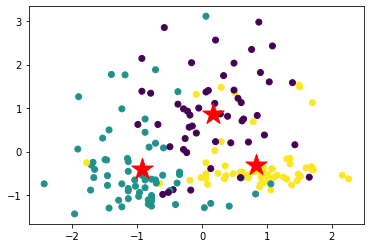

In [118]:
# 結果を出力
plt.scatter(S[:,0], S[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=500, marker='*',c='red')
plt.show()